In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [4]:
import pandas as pd

# 분석에 필요한 컬럼만 지정
usecols = ['거주시도명', '직장시도명', '가입통신회사코드', 'Segment', 'ID']

# 필요한 컬럼만 불러오기
df = pd.read_csv("../data/train/1.회원정보/train_회원정보.csv", usecols=usecols)
df

,ID,Segment,가입통신회사코드,거주시도명,직장시도명
0,TRAIN_000000,D,L사,서울,서울
1,TRAIN_000001,E,K사,경기,경기
2,TRAIN_000002,C,S사,서울,서울
3,TRAIN_000003,D,L사,부산,부산
4,TRAIN_000004,E,K사,광주,광주
...,...,...,...,...,...
2399995,TRAIN_399995,E,S사,울산,울산
2399996,TRAIN_399996,D,L사,인천,인천
2399997,TRAIN_399997,C,S사,서울,서울
2399998,TRAIN_399998,E,S사,부산,부산


<Figure size 800x500 with 0 Axes>

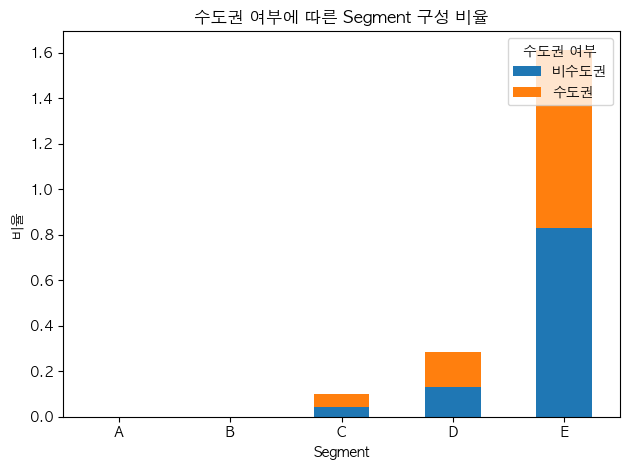

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 수도권 여부 구분
metro = ['서울', '경기', '인천']
df['수도권여부'] = df['거주시도명'].apply(lambda x: '수도권' if x in metro else '비수도권')

# 세그먼트 분포 비율 계산
metro_segment = df.groupby(["수도권여부", "Segment"]).size().unstack().fillna(0)
metro_segment_ratio = metro_segment.apply(lambda x: x / x.sum(), axis=1)

# 시각화
plt.figure(figsize=(8, 5))
metro_segment_ratio.T.plot(kind='bar', stacked=True)
plt.title("수도권 여부에 따른 Segment 구성 비율")
plt.ylabel("비율")
plt.xticks(rotation=0)
plt.legend(title="수도권 여부", loc='upper right')
plt.tight_layout()
plt.show()

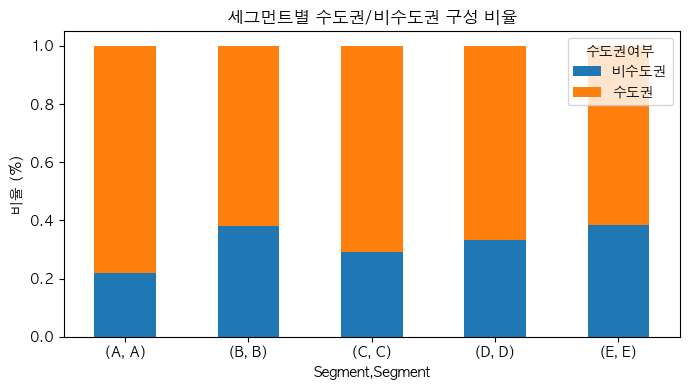

In [20]:
# 수도권 여부 부여
df['수도권여부'] = df['거주시도명'].apply(lambda x: '수도권' if x in ['서울', '경기', '인천'] else '비수도권')

# 각 세그먼트 내부에서의 수도권 비율
metro_ratio = df.groupby(['Segment', '수도권여부']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()

# 시각화
metro_ratio.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("세그먼트별 수도권/비수도권 구성 비율")
plt.ylabel("비율 (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

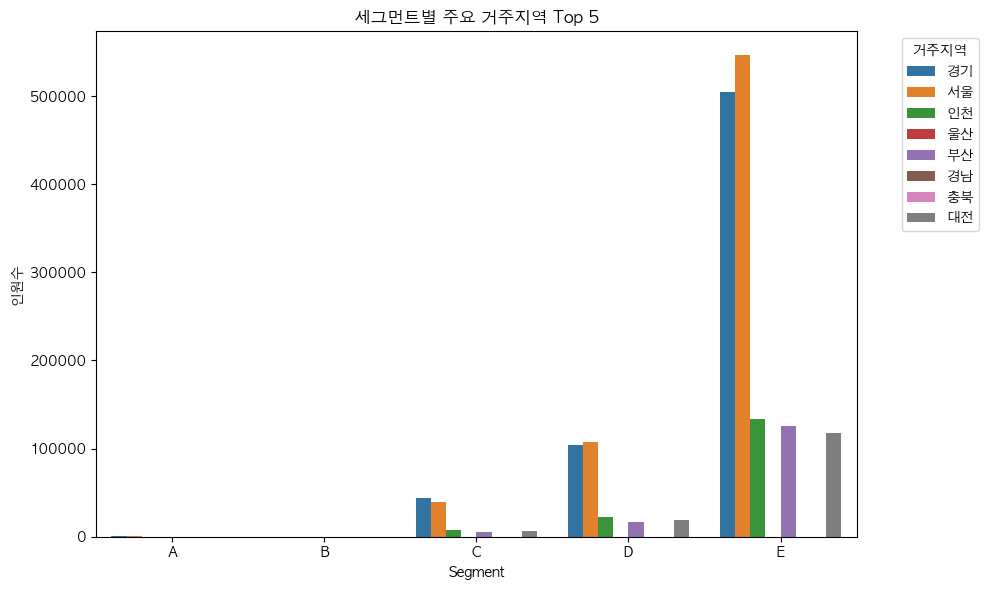

In [12]:
# 세그먼트별 거주지 Top 5
top_regions = df.groupby(['Segment', '거주시도명']).size().reset_index(name='count')
top_regions = top_regions.sort_values(['Segment', 'count'], ascending=[True, False])

# 각 세그먼트별 Top 5 지역만 추출
top5_per_segment = top_regions.groupby('Segment').head(5)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_per_segment, x='Segment', y='count', hue='거주시도명')
plt.title("세그먼트별 주요 거주지역 Top 5")
plt.ylabel("인원수")
plt.legend(title="거주지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


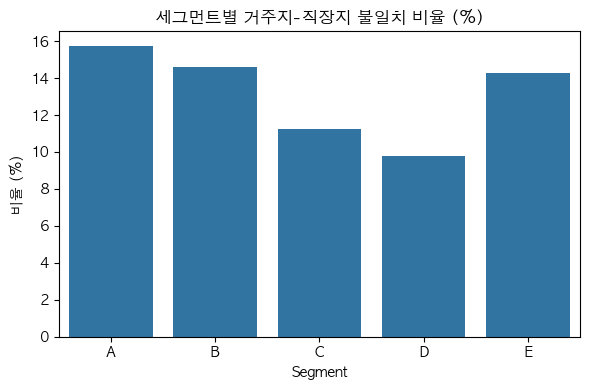

In [14]:
# 거주지와 직장지가 다른 경우를 표시
df['직장지_불일치'] = df['거주시도명'] != df['직장시도명']

# 세그먼트별 불일치율 계산
mismatch_ratio = df.groupby('Segment')['직장지_불일치'].mean() * 100

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=mismatch_ratio.index, y=mismatch_ratio.values)
plt.title("세그먼트별 거주지-직장지 불일치 비율 (%)")
plt.ylabel("비율 (%)")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

In [28]:
# 세그먼트별 수도권/비수도권 분포
metro_segment = df.groupby(["Segment", "수도권여부"]).size().unstack().fillna(0)

# 세그먼트별 비율로 변환
metro_ratio = metro_segment.div(metro_segment.sum(axis=1), axis=0).round(3)

# 결과 확인
print("✅ 세그먼트별 수도권/비수도권 비율")
display(metro_ratio)

✅ 세그먼트별 수도권/비수도권 비율


수도권여부,비수도권,수도권
Segment,,
A,0.220,0.780
B,0.382,0.618
C,0.293,0.707
D,0.331,0.669
E,0.384,0.616


In [32]:
# 거주지-직장지 불일치 여부 추가
df["시도불일치"] = (df["거주시도명"] != df["직장시도명"]).astype(int)

# 세그먼트별 불일치율 계산
mismatch_rate = df.groupby("Segment")["시도불일치"].mean().round(3)

# 결과 확인
print("✅ 세그먼트별 거주지-직장지 불일치율")
display(mismatch_rate)

✅ 세그먼트별 거주지-직장지 불일치율


Segment
A    0.157
B    0.146
C    0.112
D    0.098
E    0.143
Name: 시도불일치, dtype: float64

- A 등급이 수도권 비율이 제일 높고, E 등급은 비수도권 비율이 가장 높음